                                                             
#                                                USED CAR PRICE PREDICTION



In [206]:
'''
Context:
The used car market has become increasingly competitive, with buyers and sellers seeking more efficient
ways to evaluate pricing and quality.

Problem:
However, many buyers and sellers lack reliable methods for determining the fair price of a used car, often 
relying on subjective evaluations or incomplete data.

Importance:
This results in overpaying or underpricing of vehicles, leading to lost opportunities and dissatisfaction
for both buyers and sellers.

Scope:
This project focuses on using historical data of used car sales to develop a predictive pricing model. 
It does not address the quality evaluation of the cars themselves.

Objective:
The goal is to develop a machine learning model that predicts the optimal price for a used car based on various factors,
including model, year, price, transmission,	mileage, fuelType, tax, mpg, engineSize
'''

'\nContext:\nThe used car market has become increasingly competitive, with buyers and sellers seeking more efficient\nways to evaluate pricing and quality.\n\nProblem:\nHowever, many buyers and sellers lack reliable methods for determining the fair price of a used car, often \nrelying on subjective evaluations or incomplete data.\n\nImportance:\nThis results in overpaying or underpricing of vehicles, leading to lost opportunities and dissatisfaction\nfor both buyers and sellers.\n\nScope:\nThis project focuses on using historical data of used car sales to develop a predictive pricing model. \nIt does not address the quality evaluation of the cars themselves.\n\nObjective:\nThe goal is to develop a machine learning model that predicts the optimal price for a used car based on various factors,\nincluding model, year, price, transmission,\tmileage, fuelType, tax, mpg, engineSize\n'

In [350]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [351]:
data = pd.read_csv("audi.csv")
data.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4


In [352]:
# 10668 row and 9 columns
# There is no null value present
# There are mixed values is present

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [353]:
data.describe() # show the statistical value of numerical

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [354]:
print("Null values:\n", (data.isnull().sum() / len(data)) * 100)  # Check for missing values in percentage


Null values:
 model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64


In [355]:
print("Shape of data before duplicates removal:", data.shape)


Shape of data before duplicates removal: (10668, 9)


In [356]:
data.duplicated().value_counts() # There are 103 duplicate values are present

False    10565
True       103
Name: count, dtype: int64

In [357]:
# Remove duplicates

In [358]:
data.drop_duplicates( inplace = True)

In [359]:
print("Shape of data after duplicates removal:", data.shape)

Shape of data after duplicates removal: (10565, 9)


In [360]:
# Visualizing distributions

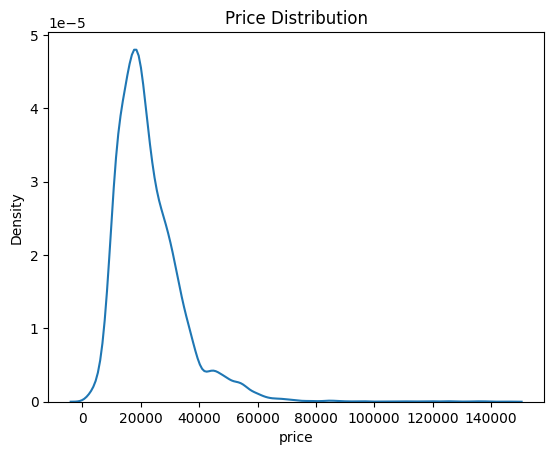

In [361]:
#Ther is skewness is there in  right side

sns.kdeplot(data["price"])
plt.title("Price Distribution")
plt.show()

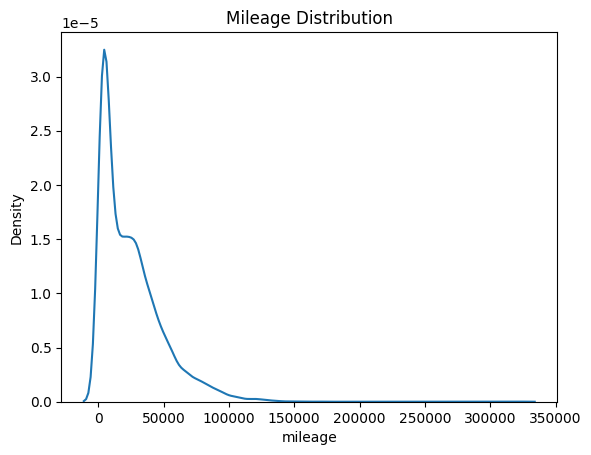

In [362]:
# There is skeweness is there in positive side
sns.kdeplot(data['mileage'])
plt.title("Mileage Distribution")
plt.show()


In [363]:
# Selecting only integer columns
corr_matrix = data.select_dtypes(include='int').corr()

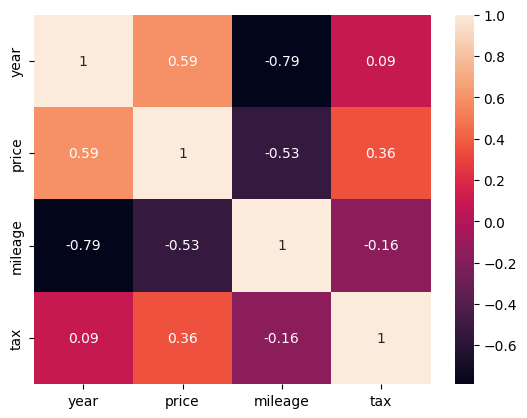

In [364]:
# Plotting heatmap to see correlation
sns.heatmap(corr_matrix, annot=True)  
plt.show()

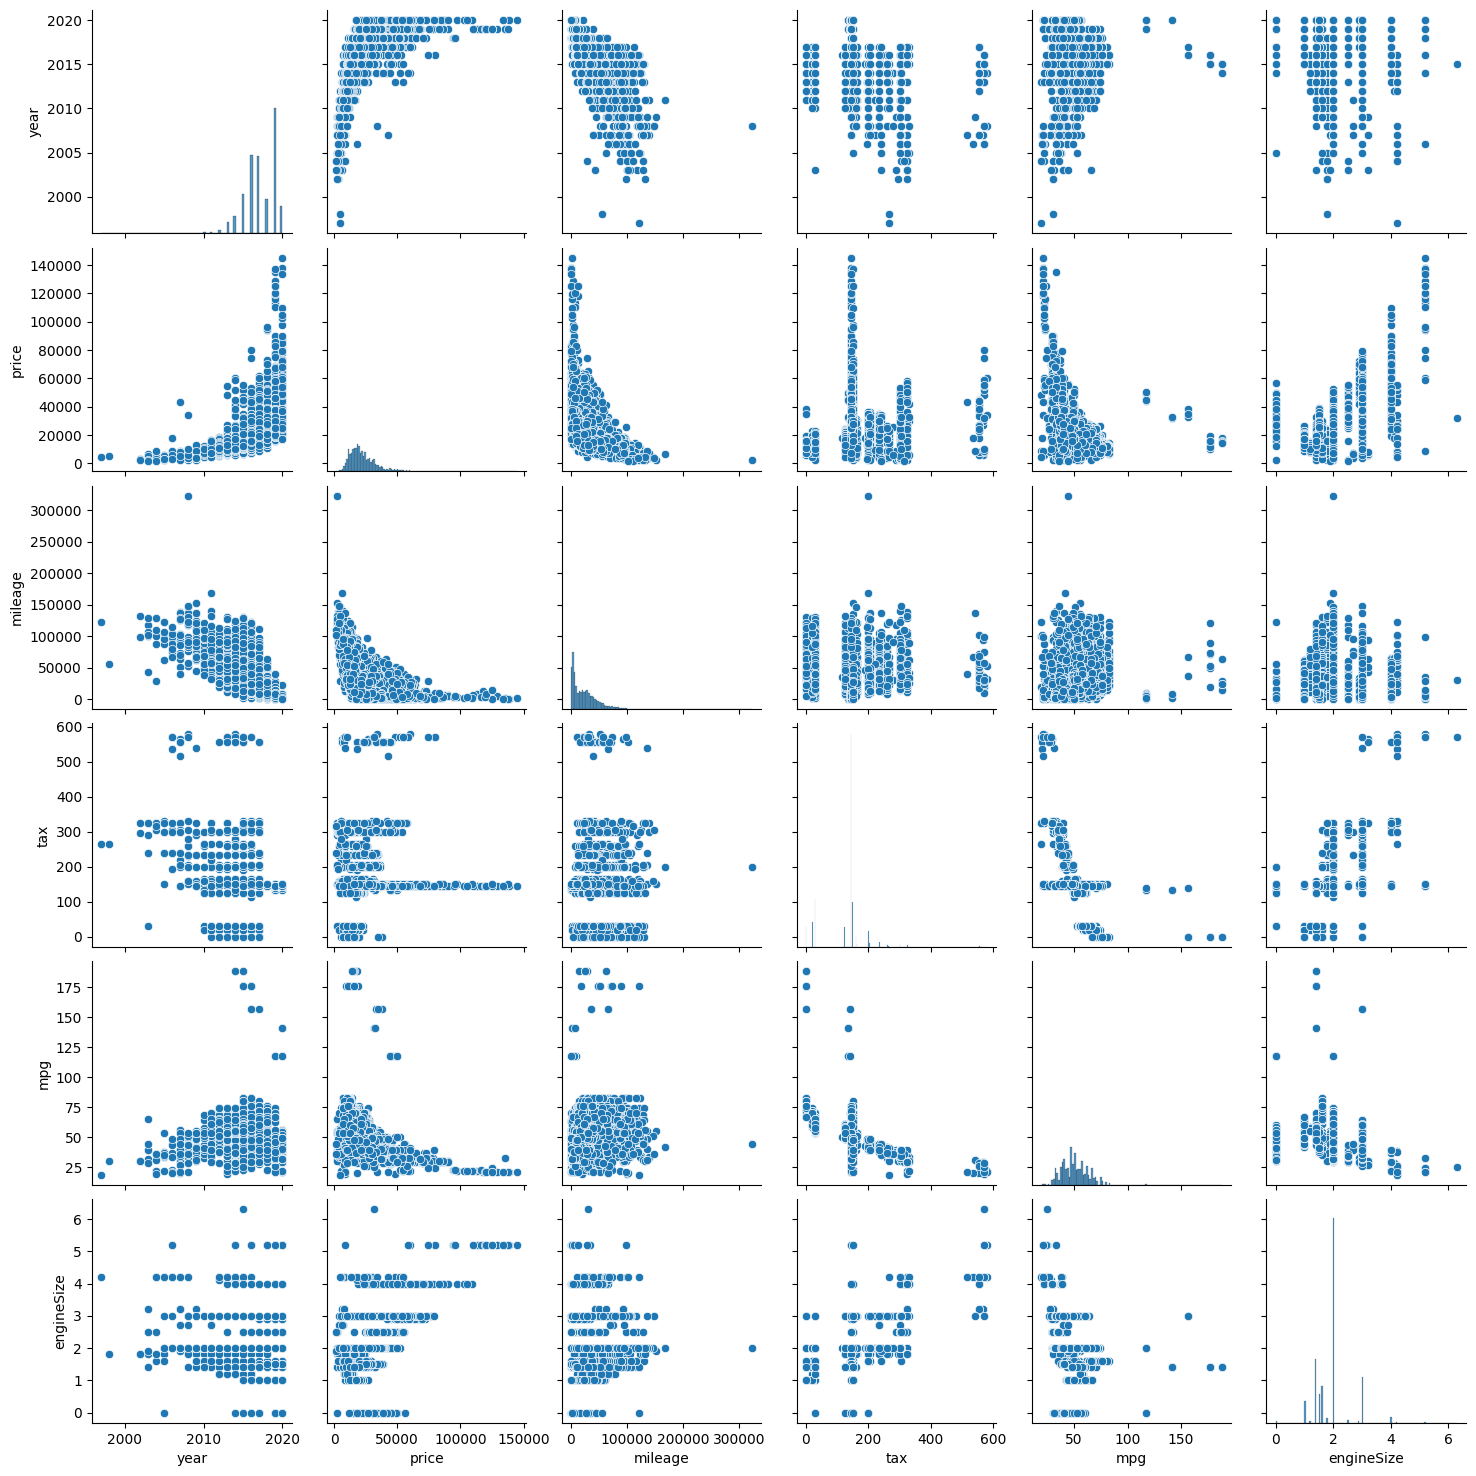

In [365]:
sns.pairplot(data)
plt.show()

year


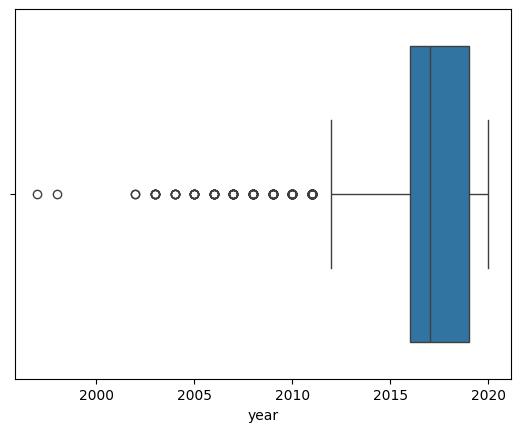

price


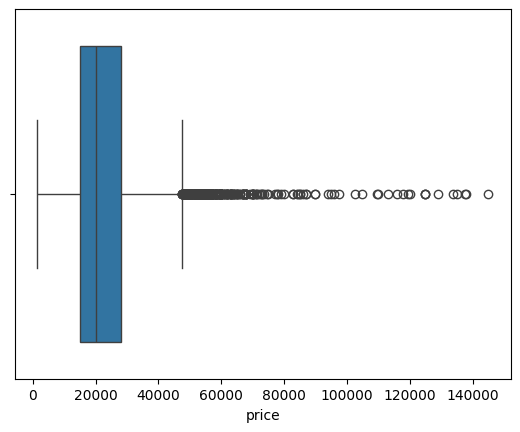

mileage


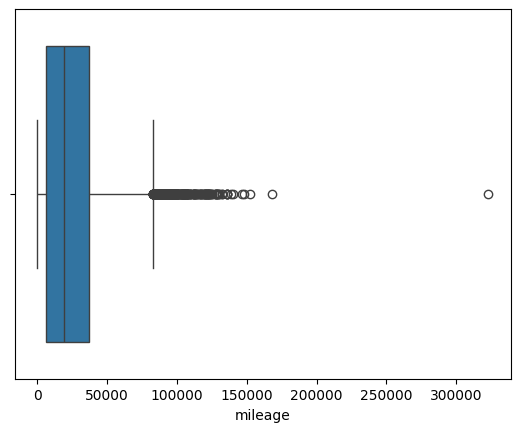

tax


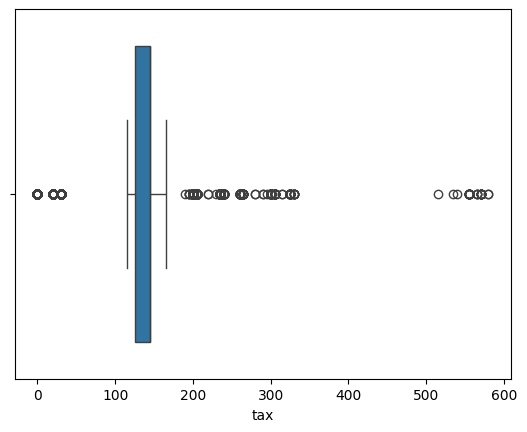

mpg


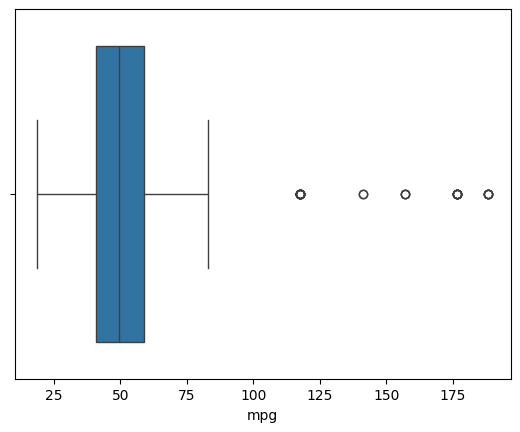

engineSize


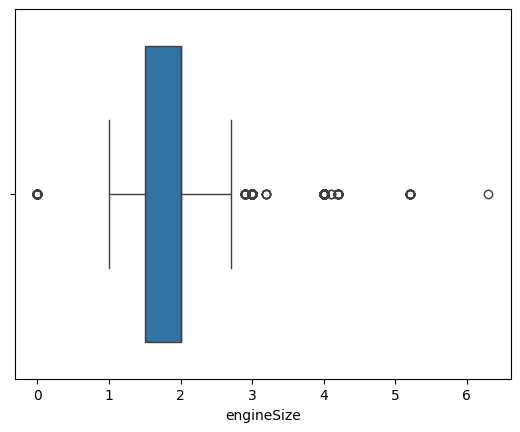

In [366]:
for col in data.select_dtypes(include=['int', 'float']):
    print(col)
    sns.boxplot(x=data[col])
    plt.show()

In [368]:
# Function to replace outliers with median
def replace_outliers_with_median(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    
    for column in numeric_cols:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = data[column].median()

        # Replace outliers with median using .loc[]
        data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = median_value

replace_outliers_with_median(data)  # Modifies df directly
print(data)

      model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  145  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel  145  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol  145  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  145  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  145  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  145  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  145  47.9         1.4

[10565 rows x 9 columns]


year


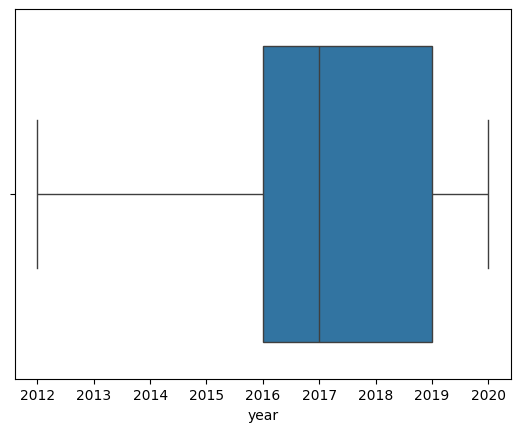

price


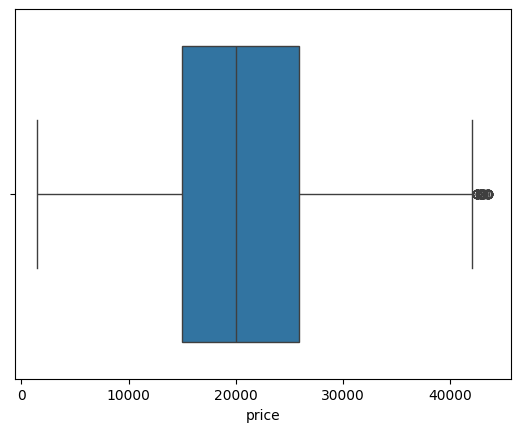

mileage


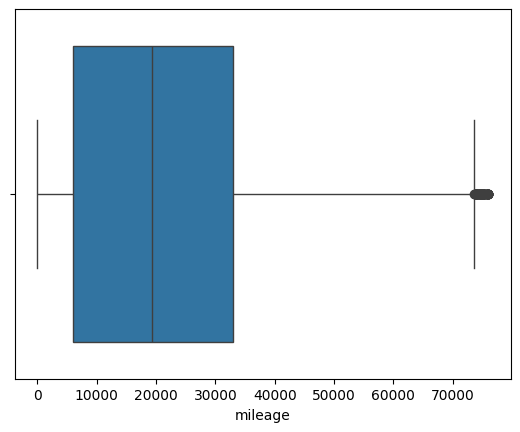

tax


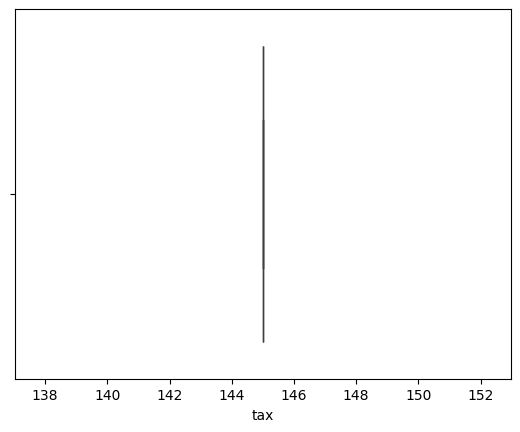

mpg


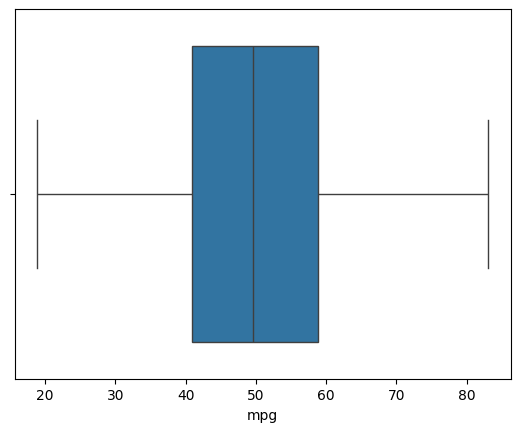

engineSize


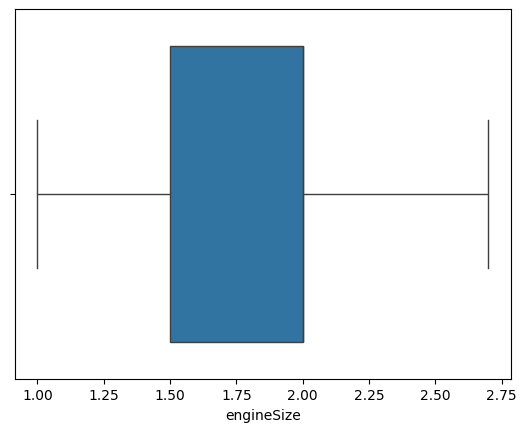

In [369]:
for col in data.select_dtypes(include=['int', 'float']):
    print(col)
    sns.boxplot(x=data[col])
    plt.show()

In [370]:
# With this the library the categorical data converted into numerical

In [371]:
from sklearn.preprocessing import LabelEncoder, StandardScaler 

In [372]:
le = LabelEncoder()

In [373]:
data["model"]=le.fit_transform(data["model"])

In [374]:
data["transmission"]=le.fit_transform(data["transmission"])

In [375]:
data["fuelType"]=le.fit_transform(data["fuelType"])

In [376]:
data.head(2)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,145,55.4,1.4
1,5,2016,16500,0,36203,0,145,64.2,2.0


In [377]:
# Scaling numerical features
scaler = StandardScaler()
num_cols = ["year", "mileage", "tax", "mpg", "engineSize"]
data[num_cols] = scaler.fit_transform(data[num_cols])

In [378]:
new_data.head(2)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,-0.308981,12500,1,-0.139398,2,0.406493,0.428533,-0.853533
1,4,-0.902832,16500,0,1.374188,0,-1.857021,1.180282,0.310183


In [379]:
#Splitting Target and Features

In [380]:
x= new_data.drop("price", axis=1)
y= new_data["price"]


In [381]:
#Splitting  dataset into training and testing sets. 

In [382]:
from sklearn.model_selection import train_test_split


In [383]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [384]:
x_train.shape

(6817, 8)

In [385]:
from sklearn.linear_model import LinearRegression

In [386]:
lr = LinearRegression()


In [387]:
lr.fit(x_train, y_train)

LinearRegression()

In [388]:
y_pred = lr.predict(x_test)

In [389]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
mae =  mean_absolute_error(y_test, y_pred)
r2=r2_score(y_pred,y_test)
print(f"mean_Absolute_error ",mae)
print(f"Accurancy of model : ",r2)

mean_Absolute_error  2685.601155911505
Accurancy of model :  0.722357528882251


In [390]:
lr.score(x_train, y_train)*100

80.0566739538454

In [391]:
lr.score(x_test, y_test)*100

78.21555465842967

In [392]:
lr.intercept_

np.float64(21962.7812780649)

In [393]:
lr.coef_

array([  244.66937338,  3372.39417281,   -64.59056123, -1440.22082087,
        -199.51722439,  -274.33571506, -1893.37443432,  3620.98619386])

In [394]:
y_pred = lr.predict(x_test)

In [395]:
from sklearn.linear_model import Lasso, Ridge

In [396]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

In [397]:
print("\nLasso Regression Model Performance:")
print("R² Score:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso Regression Model Performance:
R² Score: 0.7821573600872727
MSE: 14504171.091041755


In [398]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

In [399]:
print("\nRidge Regression Model Performance:")
print("R² Score:", r2_score(y_test, y_pred_ridge))
print("MsE:", mean_squared_error(y_test, y_pred_ridge))


Ridge Regression Model Performance:
R² Score: 0.7821516273251566
MsE: 14504552.783820488


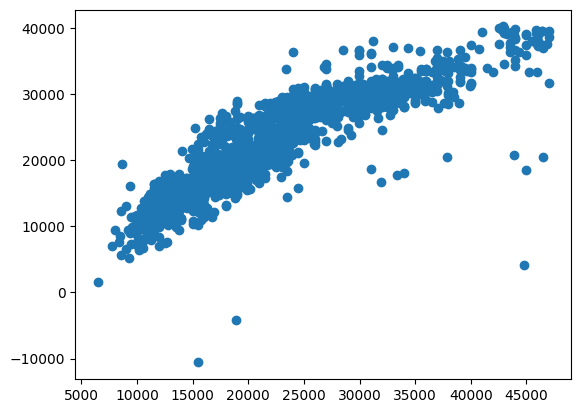

In [412]:
plt.scatter(x = y_test, y = y_pred)
plt.show()                  # not Constant

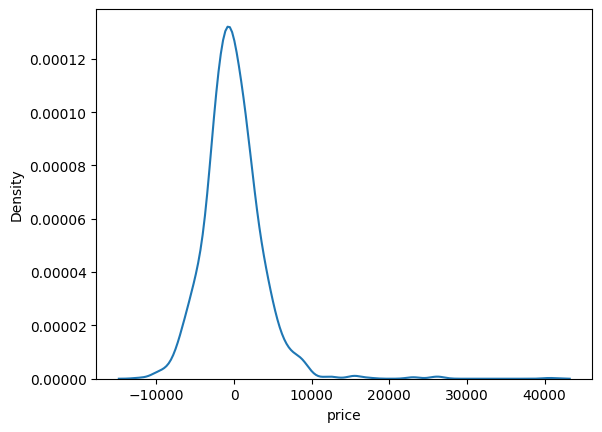

In [401]:
sns.kdeplot(y_test-y_pred) #normally distributed is also failed
plt.show()

In [402]:
residuals = y_pred - y_test

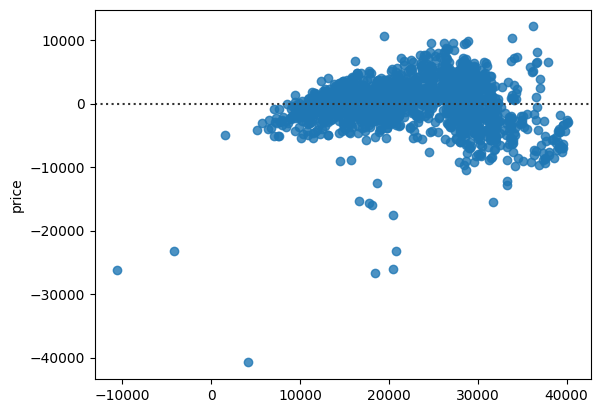

In [403]:
sns.residplot(x = y_pred,y =residuals)
plt.show()

In [287]:
# All the assumption of linear Regression are failed that's why I using a PolynomailFeatures
#Assumptions of Linear Regression:

#Linearity: The relationship between the independent variables and the dependent variable is linear.
#Independence of Errors: The residuals (errors) are independent of each other.
#Homoscedasticity: The variance of errors is constant across all levels of the independent variables.
# No Multicollinearity: There is no perfect correlation between independent variables.

In [404]:
#applying polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
xtrainp=poly.fit_transform(x_train)
xtestp=poly.transform(x_test)

In [405]:
xtrainp.shape

(6817, 45)

In [406]:
x_train.shape

(6817, 8)

In [407]:
lr=LinearRegression()
lr.fit(xtrainp,y_train)
ypred=lr.predict(xtestp)

In [408]:
mse=mean_absolute_error(ypred,y_test)
r2=r2_score(ypred,y_test)
print(f"mean_squared_error",mse)
print(f"Accuracy of model: ",r2)

mean_squared_error 2106.641769010009
Accuracy of model:  0.8617725337166597


In [409]:
lr.score(xtrainp,y_train)

0.8809672114183449

In [410]:
lr.score(xtestp,y_test)

0.8814912122288898